<a href="https://colab.research.google.com/github/dc-larson/COVID-19-EDA/blob/master/COVID_EDA_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Covid-19 Modeling Tutorail


This short report will be a run through of the Edureka Machine Learning course. This was a 2-day course I took back in March 22nd-23rd, 2020. Interestingly, the webinar was broadcasted on India Standard Time (IST), so I had to get up at 5AM each day to watch. Find the tutorial [HERE](https://learning.edureka.co/my-classroom/ai-and-ml-workshop/coursecontent?courseId=997&fromMasterCourse=0).

Focus on data manipulation and visualization.

## Purpose

The purpose of this model is to predict the spread of the virus in the next 7 days. We will specifically focus on India at present, then compare to other countries that are also experiencing severe responses to the pandemic.

In [0]:
# Load Libraries

import pandas as pd

#Visualization Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium 
from folium import plugins

# Manipulating the default plot size
plt.rcParams['figure.figsize'] = 10, 12

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

## Part I: Analysing the present condition in India

The first COVID-19 case was reported on 30th January 2020 when a student arrived Kerala from Wuhan. Just in next 2 days, Kerela reported 2 more cases. For almost a month, no new cases were reported in India, however, on 2nd March 2020, five new cases of corona virus were reported in Kerala again and since then the cases have been rising affecting 23 states, till now (Bihar being the most recent).


### Recent COVID-19 cases in India:
**21st March**

* **West Bengal** government orders shutting down of all restaurants, pubs, bars, amusement park, museum and zoo till March 31st in wake of corona virus pandemic
* Govt caps maximum retail price of 200ml hand sanitizer at Rs 100 till June
* Janata curfew: 3,700 trains cancelled on Sunday
* Bollywood singer Kanika Kapoor tests positive for COVID-19, brings political class under corona scare

### Reading in the Datasets

In [5]:
#Learn how to read a .xls file by creating a dataframe using pandas
# Read data in from a local drive
from google.colab import files
uploaded = files.upload()



In [9]:
df= pd.read_excel('/content/Covid cases in India.xlsx')
df_india = df.copy()
df

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,3,0,0,0
1,2,Chhattisgarh,1,0,0,0
2,3,Delhi,26,1,5,1
3,4,Gujarat,14,0,0,0
4,5,Haryana,3,14,0,0
5,6,Himachal Pradesh,2,0,0,0
6,7,Karnataka,20,0,2,1
7,8,Kerala,45,7,3,0
8,9,Madhya Pradesh,4,0,0,0
9,10,Maharashtra,60,3,0,2


In [0]:
# Coordinates of India States and Union Territories
India_coord = pd.read_excel('/content/Indian Coordinates.xlsx')

#Day by day data of India, Korea, Italy and Wuhan
dbd_India = pd.read_excel('/content/per_day_cases.xlsx',parse_dates=True, sheet_name='India')
dbd_Italy = pd.read_excel('/content/per_day_cases.xlsx',parse_dates=True, sheet_name="Italy")
dbd_Korea = pd.read_excel('/content/per_day_cases.xlsx',parse_dates=True, sheet_name="Korea")
dbd_Wuhan = pd.read_excel('/content/per_day_cases.xlsx',parse_dates=True, sheet_name="Wuhan")

### 1.1 COVID19 Cases in India


In [15]:
#Learn how to play around with the dataframe and create a new attribute of 'Total Case'
#Total case is the total number of confirmed cases (Indian National + Foreign National)

df.drop(['S. No.'],axis=1,inplace=True)
df['Total cases'] = df['Total Confirmed cases (Indian National)'] + df['Total Confirmed cases ( Foreign National )']
total_cases = df['Total cases'].sum()
print('Total number of confirmed COVID 2019 cases across India till date (22nd March, 2020):', total_cases)


Total number of confirmed COVID 2019 cases across India till date (22nd March, 2020): 325


In [12]:
#Try importing from a local directory
from google.colab import files 
uploaded = files.upload() 

Saving time-series-19-covid-combined.csv to time-series-19-covid-combined.csv


In [14]:
import io 
df2 = pd.read_csv(io.BytesIO(uploaded['time-series-19-covid-combined.csv'])) 

df2


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Recovered,Deaths
0,NaN,Thailand,15.0000,101.0,2020-01-22,2,0,0
1,NaN,Thailand,15.0000,101.0,2020-01-23,3,0,0
2,NaN,Thailand,15.0000,101.0,2020-01-24,5,0,0
3,NaN,Thailand,15.0000,101.0,2020-01-25,7,0,0
4,NaN,Thailand,15.0000,101.0,2020-01-26,8,2,0
...,...,...,...,...,...,...,...,...
25755,NaN,The Gambia,13.4667,-16.6,2020-03-13,0,0,0
25756,NaN,The Gambia,13.4667,-16.6,2020-03-14,0,0,0
25757,NaN,The Gambia,13.4667,-16.6,2020-03-15,0,0,0
25758,NaN,The Gambia,13.4667,-16.6,2020-03-16,0,0,0


In [16]:
#Learn how to highlight your dataframe
df.style.background_gradient(cmap='Reds')

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total cases
0,Andhra Pradesh,3,0,0,0,3
1,Chhattisgarh,1,0,0,0,1
2,Delhi,26,1,5,1,27
3,Gujarat,14,0,0,0,14
4,Haryana,3,14,0,0,17
5,Himachal Pradesh,2,0,0,0,2
6,Karnataka,20,0,2,1,20
7,Kerala,45,7,3,0,52
8,Madhya Pradesh,4,0,0,0,4
9,Maharashtra,60,3,0,2,63


* Haryana has the largest number of confirmed cases. Followed by Telegana. 

* Uttar Pradesh has reported the most cured cases.

* Maharashtra has reported the most deaths (e.g 2).

### 1.2 Number of Active COVID-19 cases in affected State/Union Territories

In [17]:
#Total Active  is the Total cases - (Number of death + Cured)
df['Total Active'] = df['Total cases'] - (df['Death'] + df['Cured'])
total_active = df['Total Active'].sum()
print('Total number of active COVID 2019 cases across India:', total_active)
Tot_Cases = df.groupby('Name of State / UT')['Total Active'].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap='Reds')

Total number of active COVID 2019 cases across India: 295


,Total Active
Name of State / UT,
Maharashtra,61
Kerala,49
Rajasthan,21
Delhi,21
Telengana,20
Haryana,17
Karnataka,17
Uttar Pradesh,16
Gujarat,14


### 1.4 Visualizing the Spread of the Pandemic Spatially

In [21]:
# Learn how to use folium to create a zoomable map

df_full = pd.merge(India_coord,df,on='Name of State / UT')
map = folium.Map(location=[20, 70], zoom_start=4,tiles='cartodbdark_matter')

for lat, lon, value, name in zip(df_full['Latitude'], df_full['Longitude'], df_full['Total cases'], df_full['Name of State / UT']):
    folium.CircleMarker([lat, lon], radius=value*0.8, popup = ('<strong>State</strong>: ' + str(name).capitalize() + '<br>''<strong>Total Cases</strong>: ' + str(value) + '<br>'),color='red',fill_color='red',fill_opacity=0.3 ).add_to(map)
map

### 1.5 Confirmed vs. Reovered Cases



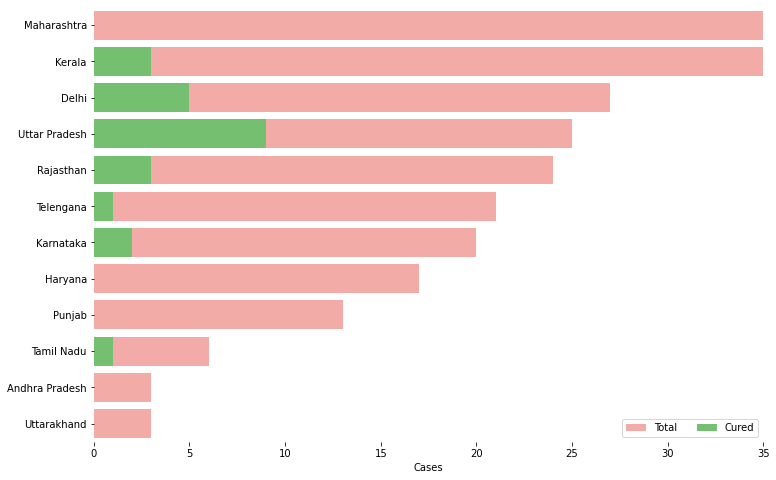

In [25]:
#Learn how to use Seaborn for visualization
fig, ax = plt.subplots(figsize=(12, 8)) #f, or fig can be used to reference the figure then it's axes.
data = df_full[['Name of State / UT','Total cases','Cured','Death']]
data.sort_values('Total cases',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Total cases", y="Name of State / UT", data=data,label="Total", color="r")

sns.set_color_codes("muted")
sns.barplot(x="Cured", y="Name of State / UT", data=data, label="Cured", color="g")


# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 35), ylabel="",xlabel="Cases")
sns.despine(left=True, bottom=True)

### 1.6 Are Cases on the Rise in India

In [0]:
#This cell's code is required when you are working with plotly on colab
import plotly
plotly.io.renderers.default = 'colab'

In [27]:
#Learn how to create interactive graphs using plotly
# import plotly.graph_objects as go
# Rise of COVID-19 cases in India
fig = go.Figure()
fig.add_trace(go.Scatter(x=dbd_India['Date'], y = dbd_India['Total Cases'], mode='lines+markers',name='Total Cases'))
fig.update_layout(title_text='Trend of Coronavirus Cases in India (Cumulative cases)',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

# New COVID-19 cases reported daily in India

import plotly.express as px
fig = px.bar(dbd_India, x="Date", y="New Cases", barmode='group', height=400)
fig.update_layout(title_text='Coronavirus Cases in India on daily basis',plot_bgcolor='rgb(230, 230, 230)')

fig.show()

## Part 2: Is the trend similar to Italy/ S.Korea/ Wuhan?

At the tie this tutorial was given, India had just passed 100 cases. Other countries have shown infection rates doubling after the __100 Confirmed Case__ mark.

### 2.1 Cumulative cases in India, Italy, S.Korea, and Wuhan


In [32]:
# import plotly.express as px
fig = px.bar(dbd_India, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in India', color_discrete_sequence = px.colors.cyclical.IceFire)

'''Colour Scale for plotly
https://plot.ly/python/builtin-colorscales/
'''

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

fig = px.bar(dbd_Italy, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in Italy', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

fig = px.bar(dbd_Korea, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in South Korea', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()
fig = px.bar(dbd_Wuhan, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in Wuhan', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

### 2.2 Comparison in Spread of Cases between Wuhan, S. Korea, Italy, and India

In [34]:
#Learn how to create subplots using plotly
# import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=2, cols=2,
    specs=[[{}, {}],
           [{"colspan": 2}, None]],
    subplot_titles=("S.Korea","Italy", "India","Wuhan"))

fig.add_trace(go.Bar(x=dbd_Korea['Date'], y=dbd_Korea['Total Cases'],
                    marker=dict(color=dbd_Korea['Total Cases'], coloraxis="coloraxis")),1, 1)

fig.add_trace(go.Bar(x=dbd_Italy['Date'], y=dbd_Italy['Total Cases'],
                    marker=dict(color=dbd_Italy['Total Cases'], coloraxis="coloraxis")),1, 2)

fig.add_trace(go.Bar(x=dbd_India['Date'], y=dbd_India['Total Cases'],
                    marker=dict(color=dbd_India['Total Cases'], coloraxis="coloraxis")),2, 1)

# fig.add_trace(go.Bar(x=dbd_Wuhan['Date'], y=dbd_Wuhan['Total Cases'],
#                     marker=dict(color=dbd_Wuhan['Total Cases'], coloraxis="coloraxis")),2, 2)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False,title_text="Total Confirmed cases(Cumulative)")

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

In [35]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=2, specs=[[{}, {}], [{"colspan": 2}, None]], subplot_titles=("S.Korea","Italy", "India"))

fig.add_trace(go.Scatter(x=dbd_Korea['Date'], y=dbd_Korea['Total Cases'], marker=dict(color=dbd_Korea['Total Cases'], coloraxis="coloraxis")), 1, 1)

fig.add_trace(go.Scatter(x=dbd_Italy['Date'], y=dbd_Italy['Total Cases'], marker=dict(color=dbd_Italy['Total Cases'], coloraxis="coloraxis")), 1, 2)

fig.add_trace(go.Scatter(x=dbd_India['Date'], y=dbd_India['Total Cases'], marker=dict(color=dbd_India['Total Cases'], coloraxis="coloraxis")), 2, 1)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False,title_text="Trend of Coronavirus cases")

fig.update_layout(plot_bgcolor='rgb(250, 242, 242)')
fig.show()

### 2.3 Trends after Passing 100 Cases


In [36]:
# import plotly.graph_objects as go

title = 'Main Source for News'
labels = ['S.Korea', 'Italy', 'India']
colors = ['rgb(122,128,0)', 'rgb(255,0,0)', 'rgb(49,130,189)']

mode_size = [10, 10, 12]
line_size = [1, 1, 8]

fig = go.Figure()


fig.add_trace(go.Scatter(x=dbd_Korea['Days after surpassing 100 cases'], 
                 y=dbd_Korea['Total Cases'],mode='lines',
                 name=labels[0],
                 line=dict(color=colors[0], width=line_size[0]),            
                 connectgaps=True,
    ))
fig.add_trace(go.Scatter(x=dbd_Italy['Days after surpassing 100 cases'], 
                 y=dbd_Italy['Total Cases'],mode='lines',
                 name=labels[1],
                 line=dict(color=colors[1], width=line_size[1]),            
                 connectgaps=True,
    ))

fig.add_trace(go.Scatter(x=dbd_India['Days after surpassing 100 cases'], 
                 y=dbd_India['Total Cases'],mode='lines',
                 name=labels[2],
                 line=dict(color=colors[2], width=line_size[2]),            
                 connectgaps=True,
    ))
    
    

#### **Summary**

* Above graph depicts the number of days after the COVID-19 cases crosses 100 vs total number of cases in each country.
* Both Italy and S.Korea have crossed the mark of 5600 in the next 13 days.
* Number of cases detected(trend) in India is less as compared to Italy and S.Korea.

India is not doing a good monitoring the situation and testing.



## Part 3: Exploring World-Wide COVID-19 Data



In [0]:
df = pd.read_csv('/content/covid_19_data.csv',parse_dates=['Last Update'])
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)

df_confirmed = pd.read_csv("/content/time_series_covid_19_confirmed.csv")
df_recovered = pd.read_csv("/content/time_series_covid_19_recovered.csv")
df_deaths = pd.read_csv("/content/time_series_covid_19_deaths.csv")

df_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)
df_recovered.rename(columns={'Country/Region':'Country'}, inplace=True)
df_deaths.rename(columns={'Country/Region':'Country'}, inplace=True)

In [39]:
df_deaths.head()

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,NaN,Japan,36.0000,138.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,2,4,4,5,6,6,6,6,6,6,6,6,10,10,15,16,19,22
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [40]:
df.head()

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


In [41]:
df2 = df.groupby(["Date", "Country", "Province/State"])[['SNo', 'Date', 'Province/State', 'Country', 'Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
df2.head()

,Date,Country,Province/State,SNo,Confirmed,Deaths,Recovered
0,01/22/2020,Hong Kong,Hong Kong,13,0.0,0.0,0.0
1,01/22/2020,Macau,Macau,21,1.0,0.0,0.0
2,01/22/2020,Mainland China,Anhui,1,1.0,0.0,0.0
3,01/22/2020,Mainland China,Beijing,2,14.0,0.0,0.0
4,01/22/2020,Mainland China,Chongqing,3,6.0,0.0,0.0


In [42]:
# Check for India's data
df.query('Country=="India"').groupby("Last Update")[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

,Last Update,Confirmed,Deaths,Recovered
0,2020-01-30 16:00:00,1.0,0.0,0.0
1,2020-01-31 08:15:00,1.0,0.0,0.0
2,2020-01-31 23:59:00,1.0,0.0,0.0
3,2020-02-02 06:03:08,2.0,0.0,0.0
4,2020-02-03 21:43:02,30.0,0.0,0.0
5,2020-02-13 18:53:02,9.0,0.0,0.0
6,2020-02-16 07:43:02,45.0,0.0,45.0
7,2020-03-02 22:33:09,10.0,0.0,6.0
8,2020-03-04 12:33:03,28.0,0.0,3.0
9,2020-03-05 13:53:03,30.0,0.0,3.0


In [43]:
#Overall worldwide Confirmed/ Deaths/ Recovered cases 
df.groupby('Date').sum().head()

,SNo,Confirmed,Deaths,Recovered
Date,,,,
01/22/2020,741,555.0,17.0,28.0
01/23/2020,2829,653.0,18.0,30.0
01/24/2020,4305,941.0,26.0,36.0
01/25/2020,6490,1438.0,42.0,39.0
01/26/2020,9071,2118.0,56.0,52.0


### 3.1 Visualizing World-Wide COVID-19 Cases


In [0]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [45]:
fig = go.Figure()
#Plotting datewise confirmed cases
fig.add_trace(go.Scatter(x=confirmed['Date'], y=confirmed['Confirmed'], mode='lines+markers', name='Confirmed',line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=deaths['Date'], y=deaths['Deaths'], mode='lines+markers', name='Deaths', line=dict(color='Red', width=2)))
fig.add_trace(go.Scatter(x=recovered['Date'], y=recovered['Recovered'], mode='lines+markers', name='Recovered', line=dict(color='Green', width=2)))
fig.update_layout(title='Worldwide NCOVID-19 Cases', xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'))

fig.show()

In [0]:
df_confirmed = df_confirmed[["Province/State","Lat","Long","Country"]]
df_temp = df.copy()
df_temp['Country'].replace({'Mainland China': 'China'}, inplace=True)
df_latlong = pd.merge(df_temp, df_confirmed, on=["Country", "Province/State"])

In [47]:
fig = px.density_mapbox(df_latlong, lat="Lat", lon="Long", hover_name="Province/State", hover_data=["Confirmed","Deaths","Recovered"], animation_frame="Date", color_continuous_scale="Portland", radius=7, zoom=0,height=700)
fig.update_layout(title='Worldwide Corona Virus Cases Time Lapse - Confirmed, Deaths, Recovered')

fig.update_layout(mapbox_style="open-street-map", mapbox_center_lon=0)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})


fig.show()

#### **Note:**

Consider going back and using a more current dataset. I find it strange they didn't publish the metadata or sources for this tutorial. Find more current data [HERE](https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases). Go through and make sure you better understand each operation such as `pandas, `matplotlib`, and `seaborn`. Did not use the `sci-kit learn` or `numpy`libraries much in this tutorial. This tutorial also has the benefit of being a pretty thorough Exploratory Data Analysis (EDA).
